<h1><center>Box Plot</center></h1><br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import fill
from matplotlib.ticker import FormatStrFormatter
from operator import add
# could also use holoview: http://holoviews.org/

In [13]:
### WASTE
merged_dataframes = pd.read_csv('BatchRun0.csv')
merged_dataframes['% recycled'] = (merged_dataframes['End-of-life - recycled'] / (
    merged_dataframes['End-of-life - repaired'] + merged_dataframes['End-of-life - sold'] + 
    merged_dataframes['End-of-life - recycled'] + merged_dataframes['End-of-life - landfilled'] + 
    merged_dataframes['End-of-life - stored'])) * 100 * 0.8036
merged_dataframes["Initial recycling costs ($/module)"] = merged_dataframes["calibration_n_sensitivity_3"] * 27.5
stocks_df = merged_dataframes.filter([
    'Year', 'Recycling costs ($/module)', 'Yearly waste'], axis=1)
merged_dataframes['Cumulative modules'] = (
    merged_dataframes['End-of-life - recycled'] / 235.2)
merged_dataframes['Cumulative net costs'] = (1 * merged_dataframes['Recycler costs'] / 
merged_dataframes['Cumulative modules']).fillna(0)
# Add a column which is just the summ of all waste
eol_pathway_df = merged_dataframes.filter([
    'Seed', 'Initial recycling costs ($/module)', '% recycled'], axis=1)
eol_pathway_df_2 = merged_dataframes.filter([
    'Seed', 'Initial recycling costs ($/module)', 'Cumulative net costs'], axis=1)
tips3 = eol_pathway_df.melt('Initial recycling costs ($/module)', var_name='cols', 
                               value_name='vals')
tips3 = tips3.rename(columns={"cols": "End of life pathway", "vals": "Fraction of deployed modules recycled"})
tips4 = eol_pathway_df_2.melt('Initial recycling costs ($/module)', var_name='cols', 
                               value_name='vals')
tips4 = tips4.rename(columns={"cols": "End of life pathway", "vals": "Recyclers' net costs in 2050 ($/module)"})
#eol_pathway_df_2.groupby(['Seed']).mean().to_csv("NetCosts.csv")
merged_dataframes.groupby(['Initial recycling costs ($/module)']).mean().to_csv("NetCosts.csv")
tips4.to_csv("tips4.csv")
tips3.to_csv("tips3.csv")

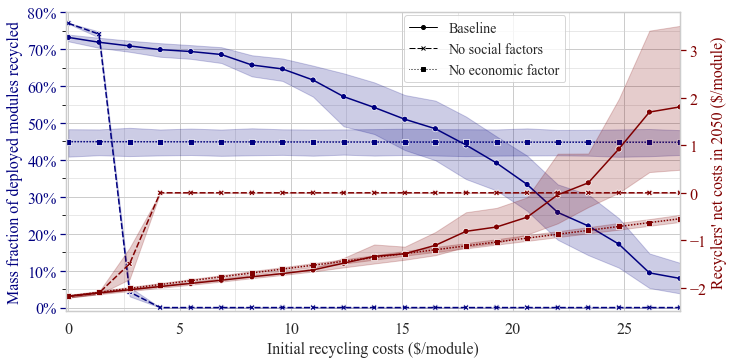

In [41]:
tips = pd.read_csv("ScatterFig2-a_v2.csv")
tips3 = pd.read_csv("data_tips3.csv")
tips4 = pd.read_csv("data_tips4.csv")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
#tips2["%"] = tips2["%"] * 100
from pylab import rcParams
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D
rcParams['figure.figsize'] = 11, 5.5
fig, ax = plt.subplots()
result2 = sns.lineplot(x="Initial recycling costs ($/module)", 
                       y="Mass fraction of deployed modules recycled", style='End-of-life decision:',
                       data=tips3, palette=["navy", "navy", "navy"], hue='End-of-life decision:', legend=False)
ax2 = sns.scatterplot(x="Initial recycling costs ($/module)", y="Mass fraction of deployed modules recycled", 
                  data=tips, ci=None, palette=["navy", "navy", "navy"], hue='End-of-life decision:', 
                      style='End-of-life decision:', legend=False)
ax.yaxis.label.set_color('navy')
ax.tick_params(axis='y', colors='navy')
ax3 = ax.twinx()
ax3.yaxis.label.set_color('maroon')
ax3.tick_params(axis='y', colors='maroon')
ax3.grid(b=None)
#result2.legend(bbox_to_anchor=(0.008, 0.93), loc=2, borderaxespad=0., fontsize=14, frameon=False)
result3 = sns.lineplot(x="Initial recycling costs ($/module)", y="Recyclers' net costs in 2050 ($/module)",
                         data=tips4, ax=ax3, palette=['maroon', 'maroon', 'maroon'], hue='End-of-life decision: ', 
                       legend=False, 
                      style='End-of-life decision: ')
ax4 = sns.scatterplot(x="Initial recycling costs ($/module)", y="Recyclers' net costs in 2050 ($/module)", 
                  data=tips, ax=ax3, ci=None, hue='End-of-life decision:', palette=['maroon', 'maroon', 'maroon'], 
                      style='End-of-life decision:', legend=False)
#result3.legend(bbox_to_anchor=(0.008, 0.83), loc=2, borderaxespad=0., fontsize=14, frameon=False)
#ax2 = sns.regplot(x="Recycling costs ($/module)", y="Fraction of deployed modules recycled", 
#                  data=tips, ci=None, color="royalblue", truncate=True)
#ax2 = sns.regplot(x="Recycling costs ($/module) ", y="Fraction of deployed modules recycled ", 
#                  data=tips, ci=None, color="cornflowerblue", truncate=True)
result2.yaxis.set_major_formatter(mtick.PercentFormatter())

legend_elements = [Line2D([0], [0], color='black', lw=1, label='Baseline', marker='o', ms=4),
                   Line2D([0], [0], color='black', lw=1, label='No social factors',
                          dashes=[6, 2], marker='x', ms=4),
                   Line2D([0], [0], color='black', lw=1, label='No economic factor',
                          dashes=[0.5, 1], marker='s', ms=4)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.55, 0.99), ncol=1, loc=2, borderaxespad=0., fontsize=14)

#ax.grid(False)
import matplotlib as mpl
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.grid(b=True, which='minor', color='lightgrey', linewidth=0.5)
ax.set_xlim(-0.1, 27.5)
ax.set_ylim(-1, 80)
#plt.text(0.1, 70, 'y=0.88-0.009x ; R2=0.94').set_color("royalblue")
#plt.text(19, 11, 'y=1.43-0.05x ; R2=0.99').set_color("cornflowerblue")
#ax.legend(bbox_to_anchor=(0.02, 0.95), ncol=1, loc=2, borderaxespad=0., fontsize=14)
#     plt.gcf().text(0.08, -0.005, "a)", weight="black", fontsize=8)
plt.savefig("figure10.2.png", bbox_inches='tight', figsize=(5.5, 3.5), dpi=500)